# Decision Tree Classifier Classifier

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = load_iris()
X = data.data
y = data.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dtc = DecisionTreeClassifier()

In [46]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [47]:
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=1)

In [48]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [49]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [50]:
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 1.0


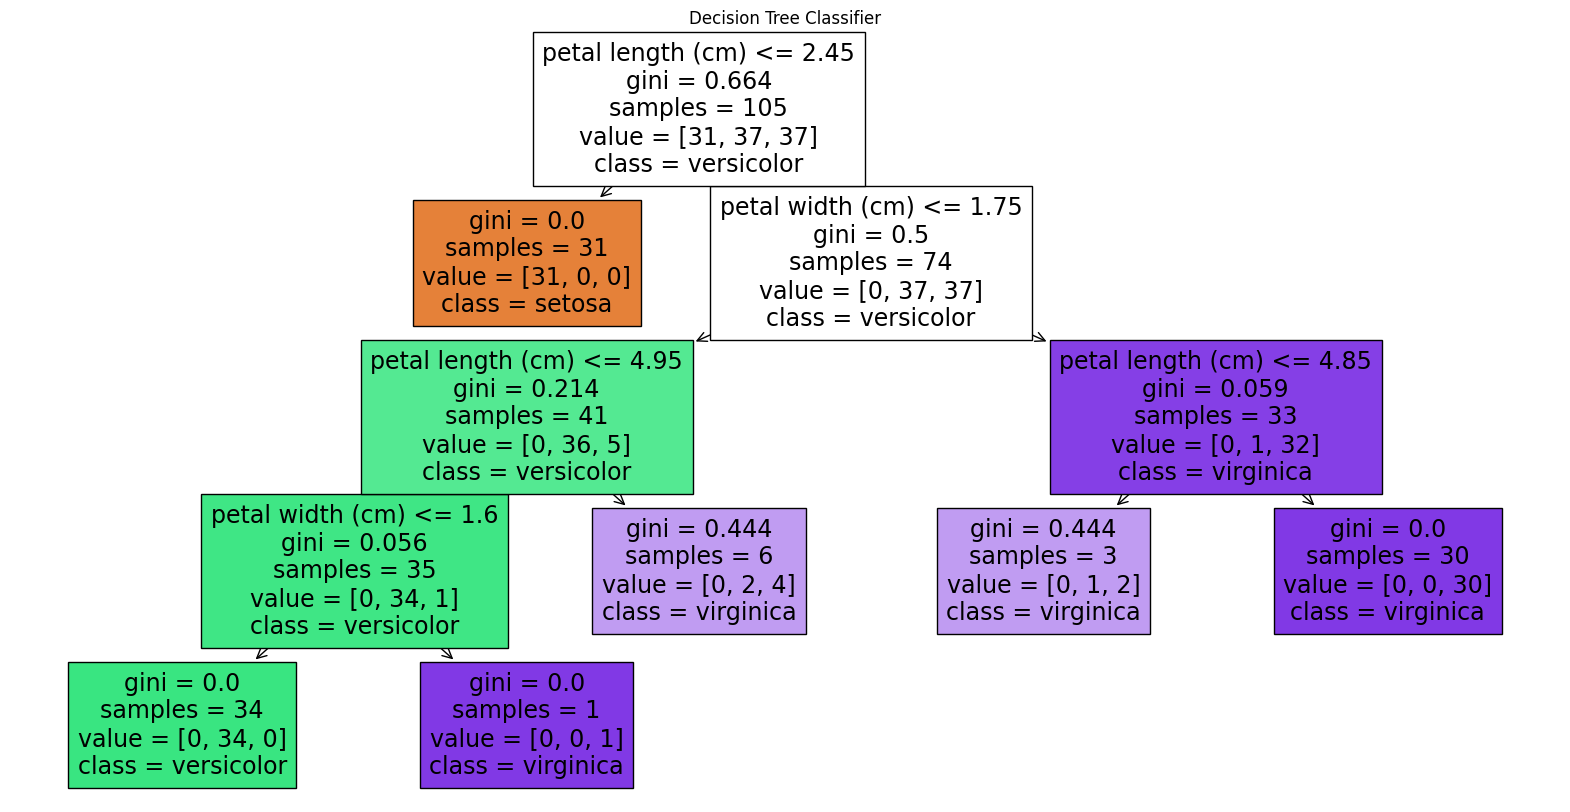

In [51]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# Decision Tree Regressor

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [53]:
data = fetch_california_housing()
X = data.data
y = data.target

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
dtr = DecisionTreeRegressor()

In [56]:
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [57]:
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

In [58]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=1)

In [59]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [60]:
y_pred = best_model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Mean Squared Error:", mse)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 20}
Test Mean Squared Error: 0.3816748540891901


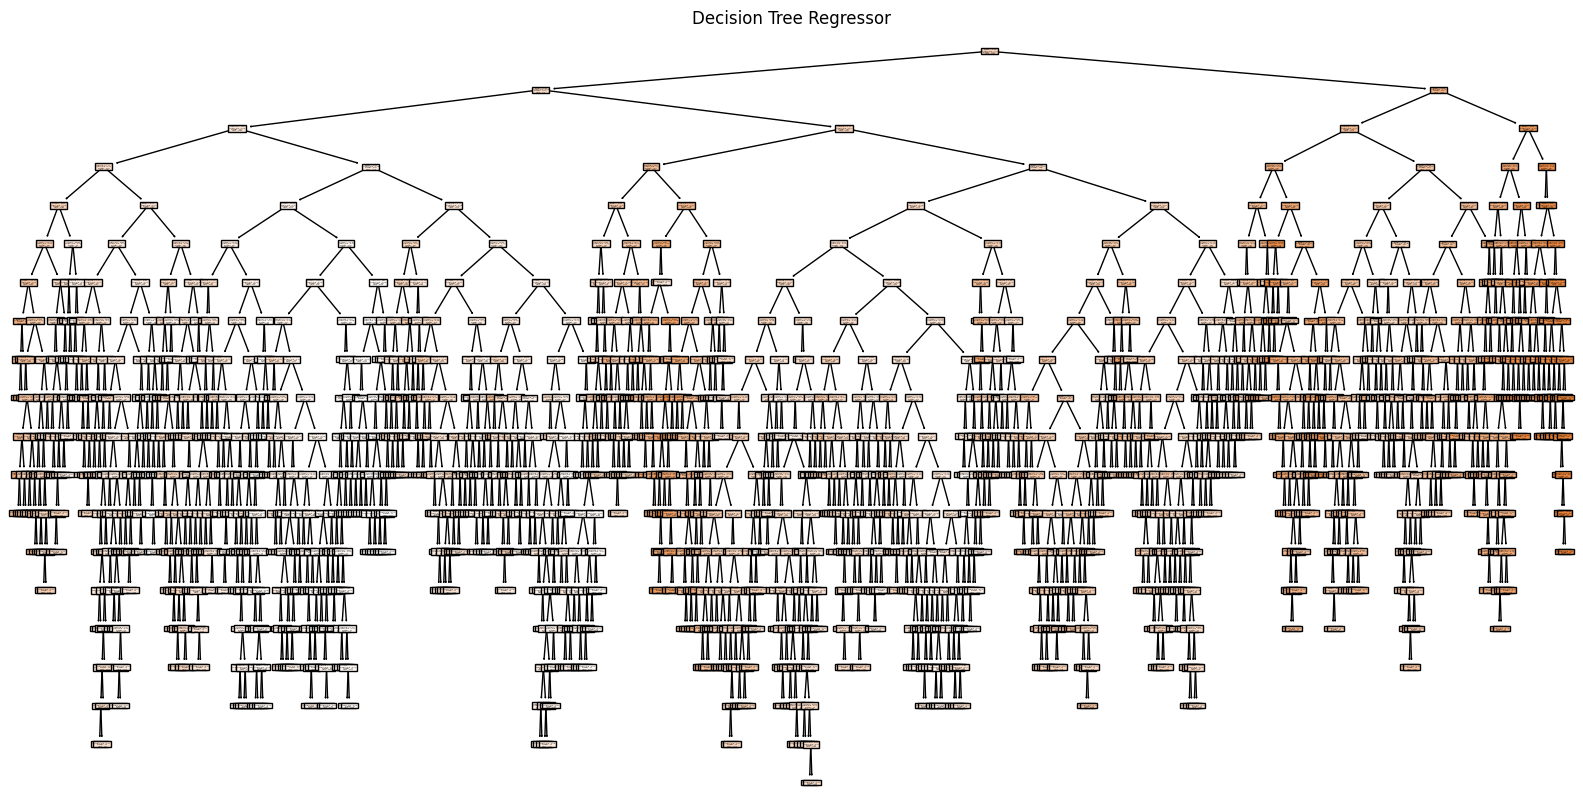

In [62]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=data.feature_names, filled=True)
plt.title("Decision Tree Regressor")
plt.show()